In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

sns.set()
%matplotlib inline

# Load the iris dataset
iris = datasets.load_iris()
# Extract the 3rd and 4th features (petal length, petal width)
X = iris.data[:, [2,3]]
y = iris.target
# Split data into training and test datasets.
# 30% is the testing data and the rest 70% is the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize features so they have the properties of standar normal distribution (mean = 0, std = 1)
# (generally, it is used if we have to compare features that have different units)
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)
# Train the perceptron model
per = Perceptron(n_iter=1000, eta0=0.01, random_state=0)
per.fit(X_train, y_train)
# Predict
y_pred = per.predict(X_test)
# Find out how many wrong classifications we had and what was the accuracy
print('Wrong classifications: {0}'.format(np.sum(y_test != y_pred)))
print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred)))

Wrong classifications: 5
Accuracy: 0.8888888888888888


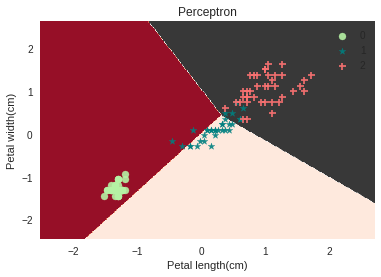

In [62]:
# Create x,y limits and a meshgrid.
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Step size in the mesh.
h_step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h_step), np.arange(y_min, y_max, h_step))
# Plot the decision boundary (predict).
# Assign a color to each point in the mesh.
fig, ax = plt.subplots()
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Make contourf plot
ax.contourf(xx, yy, Z, cmap='RdGy')
# Plot the training points
colors = ('#b6f2a5', '#008080', '#ff7373')
markers = ('o','*', '+')
# unique gives us (0,1,2)
for idx, el in enumerate(np.unique(y)):
    ax.scatter(X_train[y_train == el , 0], X_train[y_train == el, 1],marker=markers[idx], color=colors[idx], alpha=0.9, label=el)

ax.set_title('Perceptron')
ax.set_xlabel('Petal length(cm)')
ax.set_ylabel('Petal width(cm)')
plt.legend()
ax.grid(b=False)
plt.show()

We can see that the three cases cannot be separated by a linear decision boundary.This is a problem of perceptron not converging.